Let's see how to create our own filter. 

### Libraries import 

In [19]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline 

Start with loading and showing an image. 

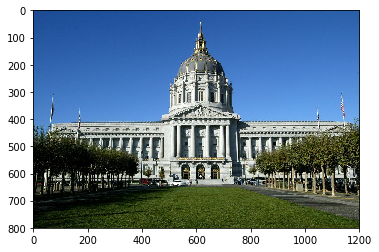

In [2]:
# load an image
image =  cv2.imread('example images/city_hall.jpg')

# convert from BGR to RGB
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)

### Convert image to grayscale

Next we convet image from RGB to GRAY scale using cv2 to **detect changes in image intensity**.

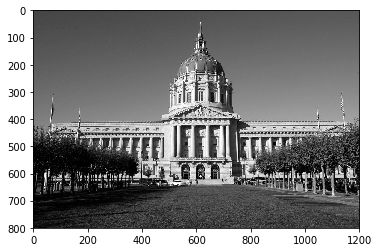

In [3]:
# convert to gray to detect changes in image intensity
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

### Create a custom filter

Then, we create a custom **edge detection filter**.<br>
First we create a one tha **detects vertical edges** and ignores horizontal edges.<br>
We will create a filter, that calculates **difference between left and right sides of pixel area in image**.<br>
For this we put negative values on the **left side and positive on right side**. Center will be zeros. <br>
Filter below is called **"Sobel"** filter. It detects intensity change in x and y directions separately. 

Top perform convolution, we will use **cv2.filter2D()** library, that inputs:
- **grayscale** image;
- **-1** means the output will have the same shape as input (called **bit-depth**);
- filter, that we created.

In [4]:
# create 3x3 image
# this kernel calculates difference between pixels on right and left sides 
# this one detects chanes along x-axis (Sobel x)

sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# perform convolution 
filtered_image = cv2.filter2D(gray, -1, sobel_x)

Let's display resulted image.

Text(0.5, 1.0, 'Filtered image')

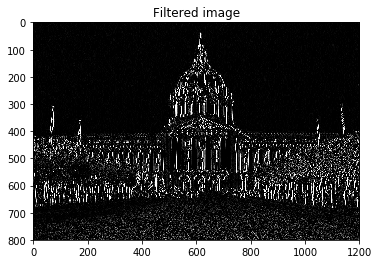

In [5]:
plt.imshow(filtered_image, cmap = 'gray')
plt.title('Filtered image')

As expected we produced an output image with highlighted **vertical edges** of the buileding and structure surrounded. 

The last step is quite common trick in Computer vision. <br>
We are going to **turn this image into binary** - purely black and white image with the **strongest edges clearly visible**. 

We will use function called **cv2.threshold()**, that inputs following arguments: 
- filtered image;
- low/high boundaries (100, 255 (white) respectfully);
- type of threshold (binary in our case).

Pixels that are **inside boundaries will be displayed as white**.

In [11]:
retval, binary_image = cv2.threshold(filtered_image, 100, 255, cv2.THRESH_BINARY)

Finally, display an image. 

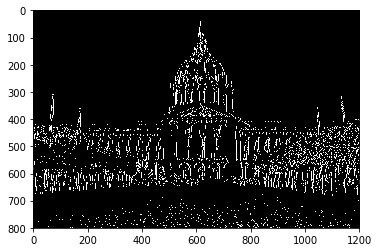

In [12]:
plt.imshow(binary_image, cmap = 'gray')

But, if we lower threshold from 100 to 30, we **will get even more edges**, that may not very useful for us. 

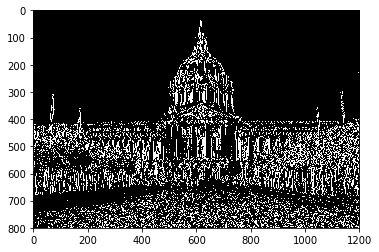

In [13]:
retval2, binary_image2 = cv2.threshold(filtered_image, 30, 255, cv2.THRESH_BINARY)
plt.imshow(binary_image2, cmap = 'gray')

Lets take a look again at **100 to 255 filtered result**: we see some **meaningless edges**, like grass, that represented as dots. <br>
This is called **noise**, and its actually **represented as dots or fuzzy details**.<br>

Basically, **high pass filtering** like this can even **exaggerate (increase) noise** in resulted image. So, we need to be cautious. <br>
We are able to use **low pass filter** to **blur an image** and reduce the noise. We usually do this before applying hagh pass filter.

### More examples

Let's **create 5x5 filters with decimal values** and apply on other image for **both x qnd y directions**.  

In [24]:
# start with vertical edge detection 
sobel5_x = np.array([[-1.5,0,0,0,1.5],
            [-3.5,0,0,0,3.5],
            [-2.5,0,0,0,2.5],
            [-3.5,0,0,0,3.5],
            [-5.5,0,0,0,5.5]])
# create filter for horizontal edges detection 
sobel5_y = np.transpose(sobel5_x)

Then, load new image, convert to gray, normalize this and apply filter on this.

In [23]:
lane_img = mpimg.imread('example images/curved_lane.jpg')
gray_img = cv2.cvtColor(lane_img, cv2.COLOR_RGB2GRAY)
gray_norm = gray_img/255.0

We can quickly visualize and print the shape of an image. 

Shape of an image: (720, 1280, 3)


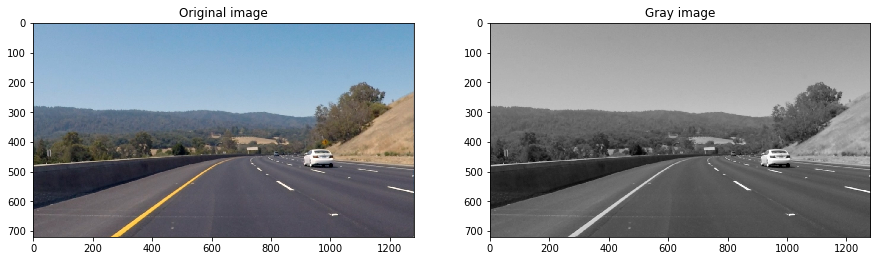

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,6))

ax1.imshow(lane_img)
ax1.set_title('Original image')

ax2.imshow(gray_img, cmap = "gray")
ax2.set_title('Gray image')
print('Shape of an image:', lane_img.shape)

Let's apply both filters and check how they **detect edges in both directions: x and y**. 

Text(0.5, 1.0, 'Filtered with horizontal edges')

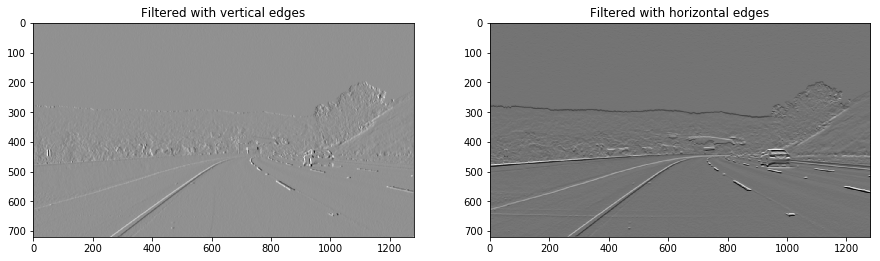

In [32]:
filter_img_x = cv2.filter2D(gray_norm, -1, sobel5_x)
filter_img_y = cv2.filter2D(gray_norm, -1, sobel5_y)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,6))

ax1.imshow(filter_img_x, cmap = 'gray')
ax1.set_title('Filtered with vertical edges')

ax2.imshow(filter_img_y,  cmap = 'gray')
ax2.set_title('Filtered with horizontal edges')

From above images we can observe that horizontal edges are detected much better (applied Sobel y). <br>
However, vertical edges, like roadway are represented as well. 